# Import Libraries and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle as pkl
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# cleaned alerts dataset
with open('data/modeling_data.pkl', 'rb') as f:
    df = pkl.load(f)

In [3]:
# cleaned ridership dataset
irt = pd.read_csv('data/irt_ridership.csv')

Both of these datasets were cleaned in the data_cleaning folder, if you'd like to see how.

That folder will also link the datasets original sources, and include the code I used to scrape data from the MTA Alerts Archive.

# EDA

## Correlation Heatmap

In [4]:
features_df = df[['delayed_irt', 'bronx', 'brooklyn', 'manhattan', 'queens', 'direction_bronx', 'direction_brooklyn', 'direction_manhattan',
                   'direction_queens', 'direction_unspecified', 'causes_other', 'causes_passenger', 'causes_station', 'causes_train',
                  'causes_weather', 'rush_hour', 'mon', 'tue', 'wed', 'th', 'fri', 'weekend', 'max_temp', 'avg_temp', 'min_temp',
                  'avg_wind_spd', 'fastest_wind_spd', 'major_conditions', 'minor_conditions', 'neutral_conditions', 'clear_conditions',
                  'prcp', 'snowfall', 'snowfall_depth']]

### Just the Features

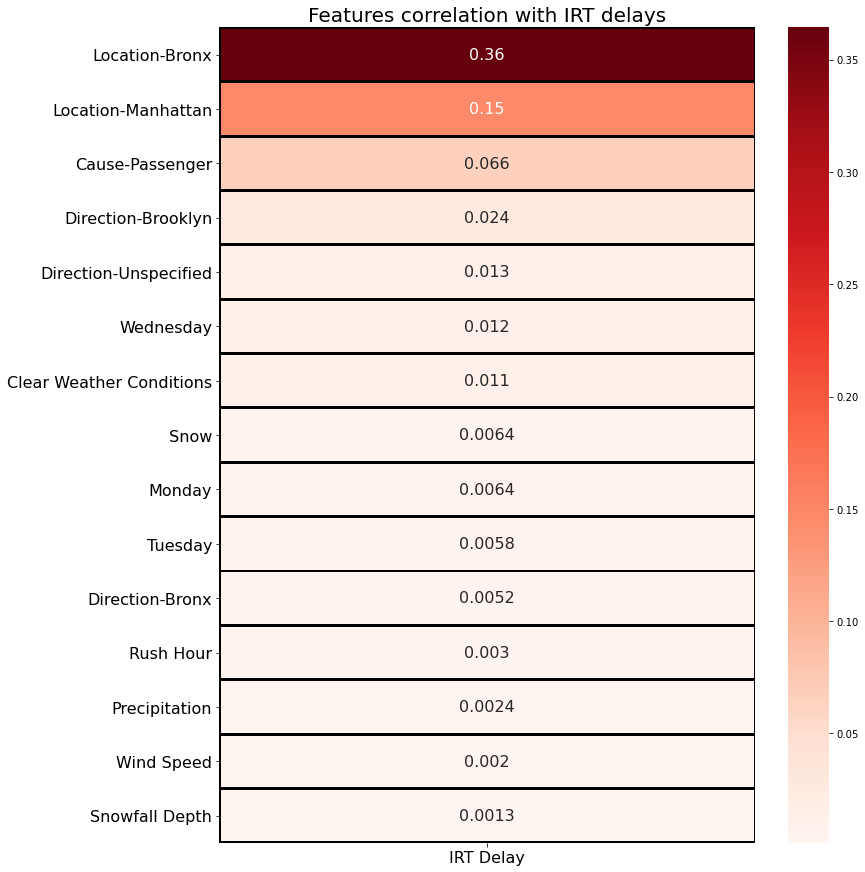

In [5]:
y_labels = ['Location-Bronx','Location-Manhattan','Cause-Passenger','Direction-Brooklyn','Direction-Unspecified',
           'Wednesday','Clear Weather Conditions',' Snow','Monday','Tuesday','Direction-Bronx',
           'Rush Hour','Precipitation','Wind Speed','Snowfall Depth']
corr = features_df.corr().drop(['delayed_irt'])
x=corr[['delayed_irt']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_irt'],ascending=0)[:15],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           yticklabels=y_labels,
           xticklabels=['IRT Delay']);
ax.set_title('Features correlation with IRT delays',size=20)
ax.tick_params(labelsize=16)

### Stations

In [6]:
stations_df = df[['delayed_irt','103 st (1)', '103 st (6)', '103 st-corona plza (7)', '110 st (6)', '111 st (7)',
                  '116 st (2/3)', '116 st (6)', '116 st-columbia (1)', '125 st (2/3)', '125 st (4/5/6)',
                  '135 st (2/3)', '137 st-city clg (1)', '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3/F/L/M)',
                  '14 st-union sq (4/5/6/L/N/Q/R/W)', '145 st (1)', '145 st (3)', '149 st-grand concourse (2/4/5)',
                  '157 st (1)', '161 st-yankee stdm (4/B/D)', '167 st (4)', '168 st-broadway (1/A/C)', '170 st (4)',
                  '174 st (2/5)', '176 st (6)', '18 st (1)', '181 st (1)', '183 st (4)', '191 st (1)', '207 st (1)',
                  '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)', '231 st (1)', '233 st (2/5)',
                   '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)', '33 st (6)',
                  '33 st-rawson st (7)', '34 st-hudson yd (7)', '34 st-penn sta (1/2/3/A/C/E)', '40 st-lowery st (7)',
                  '42 st bryant pk-5 av (7/B/D/F/M)', '46 st-bliss st (7)', '50 st (1)', '52 st-lincoln (7)',
                   'lexington av-59 st (4/5/6/N/Q/R/W)', '59 st-columbus cr (1/A/B/C/D)', '61 st-woodside (7)',
                  '66 st-lincoln ctr (1)', '68 st-hunter clg (6)', '69 st-fisk av (7)', '72 st (1/2/3)',
                  '77 st (6)', '79 st (1)', '82 st-jackson hts (7)', '86 st (1)', '86 st (4/5/6)', '90 st-elmhurst (7)',
                   '96 st (1/2/3)', '96 st (6)', 'allerton av (2/5)', 'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
                  'baychester av (5)', 'bedford pk blvd (4)', 'bergen st (2/3)', 'beverly rd (2/5)', 'borough hall-court st (2/3/4/5/R)',
                  'bowling green (4/5)', 'broadway-lafayette/bleecker st (6/B/D/F/Q)', 'bronx pk east (2/5)', 'brook av (6)',
                   'brooklyn bridge-city hall (4/5/6/J/Z)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)', 'canal st (1)',
                  'canal st (6/J/N/Q/R/W/Z)', 'castle hill av (6)', 'cathedral pkwy-110 st (1)', 'chambers st-wtc (1/2/3/A/C/E/R/W)',
                  'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)', 'crown hts-utica av (3/4)', 'ctl park n-110 st (2/3)',
                  'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)', 'eastchester dyre av (5)',
                  'eastern pkwy (2/3)', 'elder av (6)', 'flatbush av-bk clg (2/5)', 'flushing-main st (7)', 'fordham rd (4)',
                  'franklin av (2/3/4/5/S)', 'franklin st (1)', 'freeman st (2/5)', 'fulton st (2/3/4/5/A/C/J/Z)', 'grand army plza (2/3)',
                  'grand ctl-42 st (4/5/6/7)', 'gun hill rd (2/5)', 'gun hill rd (5)', 'harlem-148 st (3)', 'houston st (1)', 'hoyt st (2/3)',
                   'hunters pt (7)', 'hunts pt av (6)', 'intervale av (2/5)', 'jackson av (2/5)', 'jackson hts-roosevelt av (7/E/F/M/R)',
                  'junction blvd (7)', 'junius st (3)', 'kingsbridge rd (4)', 'kingston av (4)', 'lexington av-53 st (6/E/M)', 'longwood av (6)',
                   'marble hill-225 st (1)', 'mets-willets pt (7)', 'middletown rd (6)', 'morris pk (5)', 'morrison av (6)',
                  'moshulu pkwy (4)','mt eden av (4)', 'nereid av (2/5)', 'nevins st (2/3/4/5)', 'new lots av (3)', 'newkirk av (2/5)',
                   'nostrand av (3)', 'park pl (2/3/A/C/E)', 'parkchester (6)', 'pelham bay pk (6)', 'pelham pkwy (2/5)', 'pelham pkwy (5)',
                  'pennsylvania av (3)', 'president st (2/5)', 'prospect av (2/5)', 'queensboro plza (7/N/Q/W)', 'rector st (1)', 'rockaway av (3)',
                  'saratoga av (3)', 'simpson st (2/5)', 'south ferry (1/R/W)', 'spring st (6)', 'st lawrence av (6)', 'sterling st (2/5)',
                  'sutter av (3)', 'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)', 'van cortlandt park-242 st (1)', 'van siclen av (3)',
                  'vernon-jackson (7)', 'wakefield-241 st (2)', 'wall st (2/3)', 'wall st (4/5)', 'west farm sq-e tremont (2/5)', 'westchester sq (6)',
                  'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'zerega av (6)']]

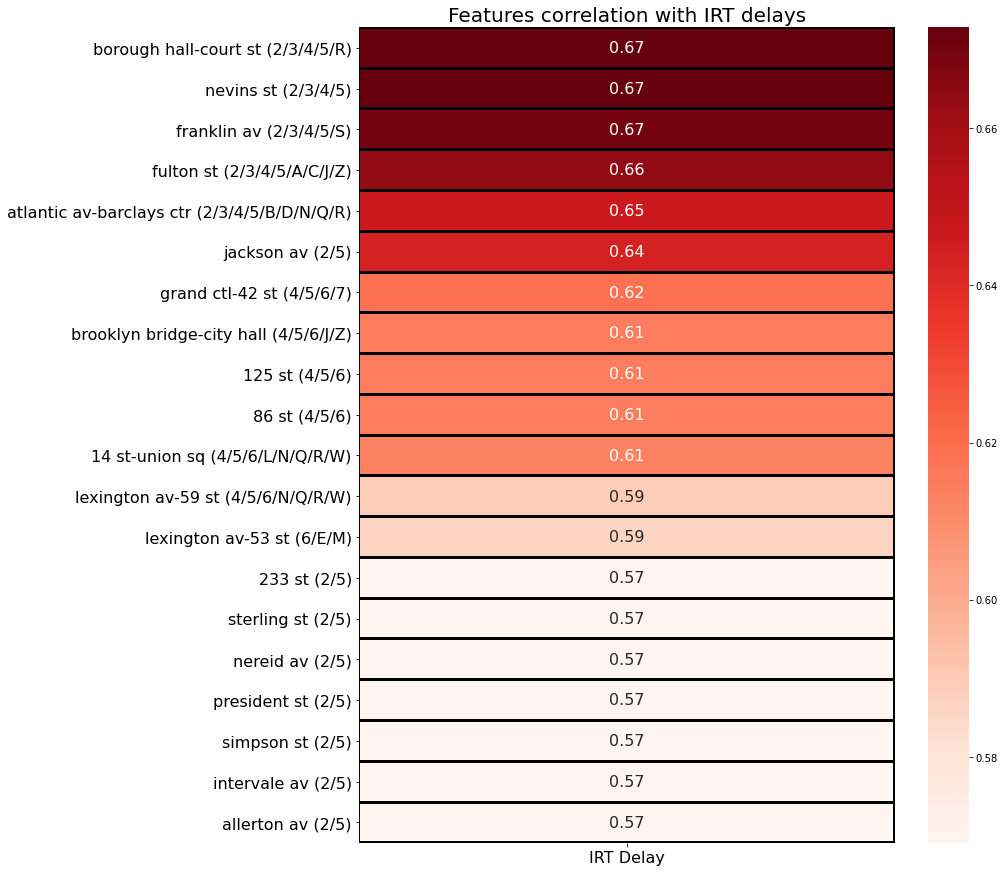

In [7]:
corr = stations_df.corr().drop(['delayed_irt'])
x=corr[['delayed_irt']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_irt'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           xticklabels=['IRT Delay']);
ax.set_title('Features correlation with IRT delays',size=20)
ax.tick_params(labelsize=16)

## Causes

In [8]:
causes = df[['delayed_irt','causes_other','causes_passenger', 'causes_station', 'causes_train', 'causes_weather']]
causes = causes.loc[causes['delayed_irt']==1]
causes.drop('delayed_irt',axis=1,inplace=True)

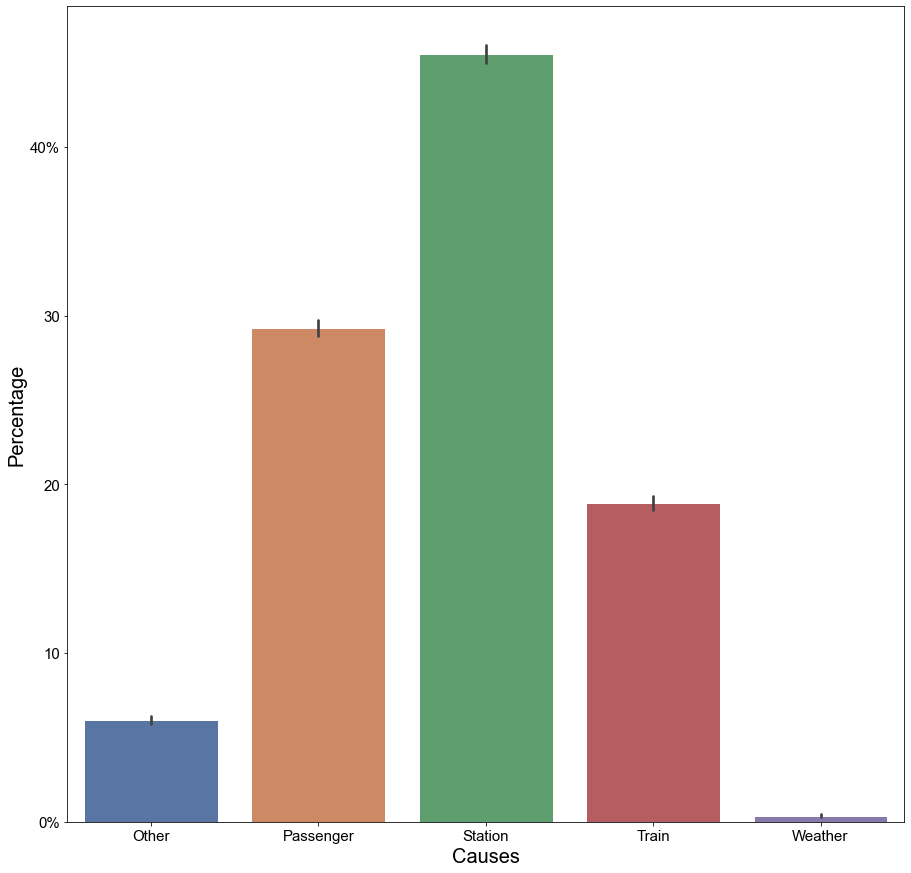

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=causes)
ax.set_xticklabels(['Other','Passenger','Station','Train','Weather'],fontsize=15)
ax.set_yticklabels(['0%', 10, 20, 30, '40%'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);
warnings.filterwarnings('ignore')

"Station" refers to problems in the station, including but not limited to:

* Track problems
* Signal/Switch problems
* Flooding
* Loss of power

## Boroughs

In [10]:
boro = df[['delayed_irt','bronx','brooklyn','manhattan','queens']]
boro = boro.loc[boro['delayed_irt']==1]
boro.drop('delayed_irt',axis=1,inplace=True)

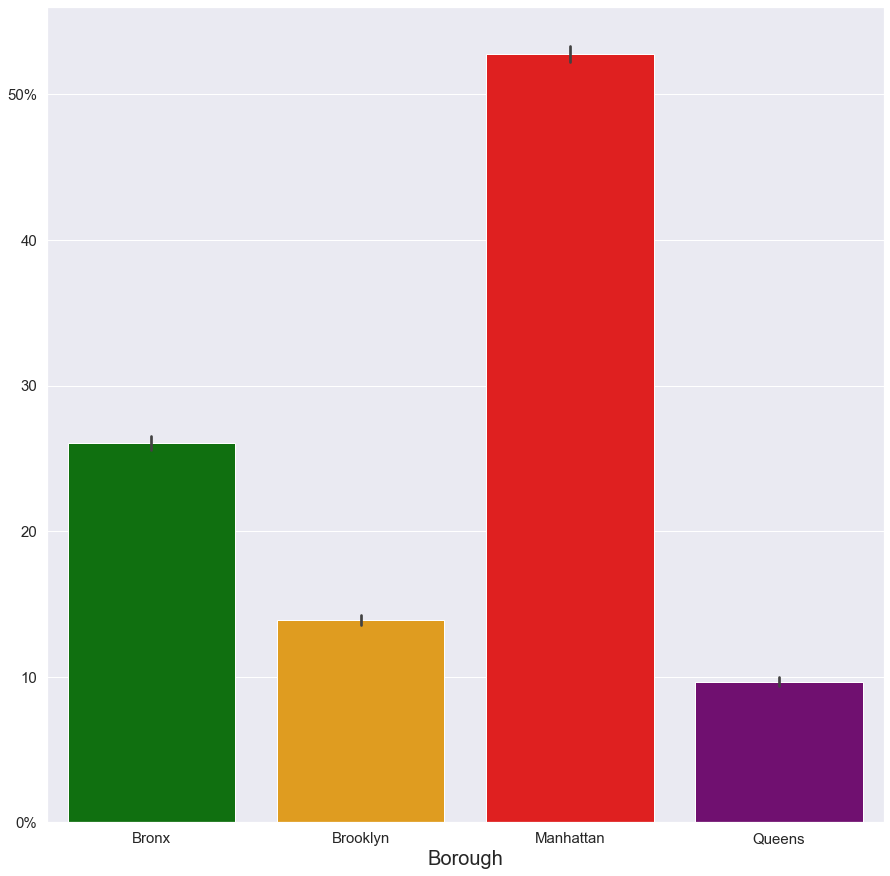

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=boro,palette=['green','orange','red','purple'])
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens'],fontsize=15)
ax.set_yticklabels(['0%',10,20,30,40,'50%'],fontsize=15)
ax.set_xlabel('Borough',fontsize=20);
warnings.filterwarnings('ignore')

## Rush Hour

In [12]:
rh = df[['delayed_irt','rush_hour']]
rh = rh.loc[rh['delayed_irt']==1]
rh.drop('delayed_irt',axis=1,inplace=True)

In [13]:
rhdf = pd.DataFrame(rh.value_counts(),columns=['ct'])
rhdf.reset_index(inplace=True)
rhdf['rush_hour'].loc[rhdf['rush_hour']==0] = 'Not Rush Hour'
rhdf['rush_hour'].loc[rhdf['rush_hour']==1] = 'Rush Hour'
rhdf.set_index('rush_hour',inplace=True)
warnings.filterwarnings('ignore')

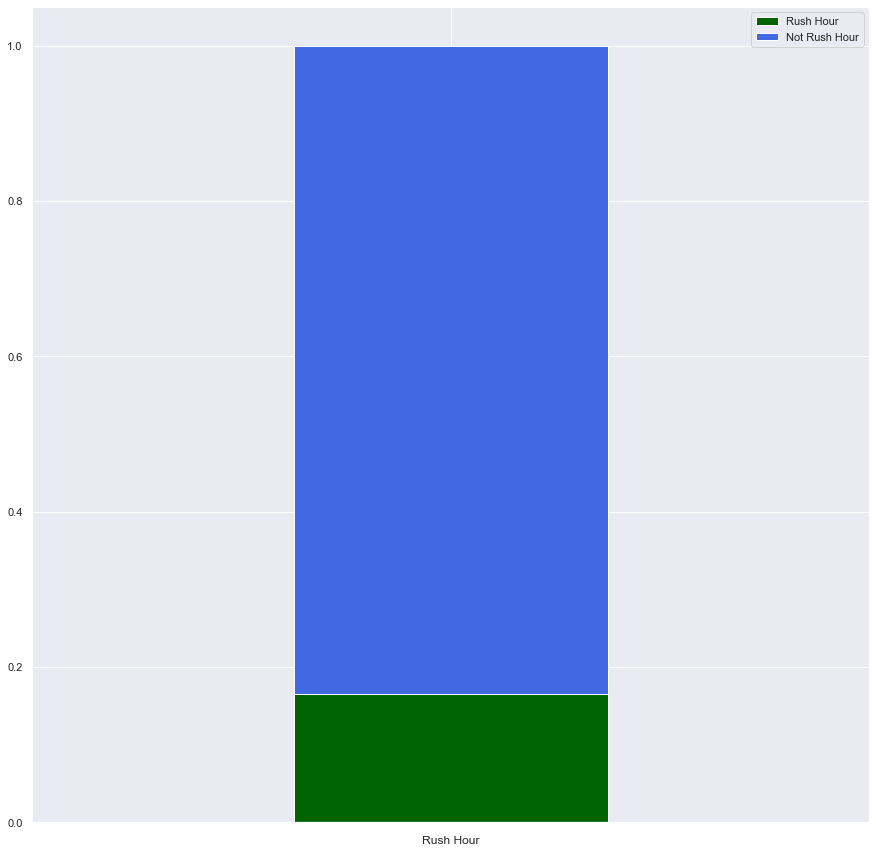

In [14]:
x = rhdf.index
y = [x[0]/sum(rhdf.values) for x in rhdf.values]

d = {x[val]:y[val] for val in range(0,len(x))}
d_sort = pd.DataFrame(dict(sorted(d.items(),key=lambda x:x[1])),index=[''])

sns.color_palette('rocket',as_cmap=True)

d_sort.plot(kind='bar',stacked=True,color=['darkgreen','royalblue'],
            xlabel='Rush Hour',width=.3,figsize=(15,15));

Rush Hour somewhat surprisingly only makes up about 16% of all delays

## Stations

In [15]:
stations = df[['delayed_irt','103 st (1)', '103 st (6)', '103 st-corona plza (7)', '110 st (6)', '111 st (7)', '116 st (2/3)',
                '116 st (6)', '116 st-columbia (1)', '125 st (2/3)', '125 st (4/5/6)', '135 st (2/3)', '137 st-city clg (1)',
               '138 st-grand concourse (4/5)', '14 st-7 av (1/2/3/F/L/M)', '14 st-union sq (4/5/6/L/N/Q/R/W)', '145 st (1)',
               '145 st (3)', '149 st-grand concourse (2/4/5)', '157 st (1)', '161 st-yankee stdm (4/B/D)', '167 st (4)',
               '168 st-broadway (1/A/C)', '170 st (4)', '174 st (2/5)', '176 st (6)', '18 st (1)', '181 st (1)', '183 st (4)',
                '191 st (1)', '207 st (1)', '215 st (1)', '219 st (2/5)', '225 st (2/5)', '23 st (1)', '23 st (6)', '231 st (1)',
               '233 st (2/5)', '238 st (1)', '28 st (1)', '28 st (6)', '3 av-138 st (6)', '3 av-149 st (2/5)', '33 st (6)',
               '33 st-rawson st (7)', '34 st-hudson yd (7)', '34 st-penn sta (1/2/3/A/C/E)', '40 st-lowery st (7)', '42 st bryant pk-5 av (7/B/D/F/M)',
               '46 st-bliss st (7)', '50 st (1)', '52 st-lincoln (7)', 'lexington av-59 st (4/5/6/N/Q/R/W)', '59 st-columbus cr (1/A/B/C/D)',
                '61 st-woodside (7)', '66 st-lincoln ctr (1)', '68 st-hunter clg (6)', '69 st-fisk av (7)', '72 st (1/2/3)',
               '77 st (6)', '79 st (1)', '82 st-jackson hts (7)', '86 st (1)', '86 st (4/5/6)', '90 st-elmhurst (7)',
               '96 st (1/2/3)', '96 st (6)', 'allerton av (2/5)', 'astor pl (6)', 'atlantic av-barclays ctr (2/3/4/5/B/D/N/Q/R)',
               'baychester av (5)', 'bedford pk blvd (4)', 'bergen st (2/3)', 'beverly rd (2/5)', 'borough hall-court st (2/3/4/5/R)',
               'bowling green (4/5)', 'broadway-lafayette/bleecker st (6/B/D/F/Q)', 'bronx pk east (2/5)', 'brook av (6)',
               'brooklyn bridge-city hall (4/5/6/J/Z)', 'buhre av (6)', 'burke av (2/5)', 'burnside av (4)', 'canal st (1)',
               'canal st (6/J/N/Q/R/W/Z)', 'castle hill av (6)', 'cathedral pkwy-110 st (1)', 'chambers st-wtc (1/2/3/A/C/E/R/W)',
               'christopher st (1)', 'church av (2/5)', 'clark st (2/3)', 'court sq (7)', 'crown hts-utica av (3/4)',
               'ctl park n-110 st (2/3)', 'cypress av (6)', 'dyckman st (1)', 'e 143 st (6)', 'e 149 st (6)', 'e 180 st (2/5)',
               'eastchester dyre av (5)', 'eastern pkwy (2/3)', 'elder av (6)', 'flatbush av-bk clg (2/5)', 'flushing-main st (7)',
               'fordham rd (4)', 'franklin av (2/3/4/5/S)', 'franklin st (1)', 'freeman st (2/5)', 'fulton st (2/3/4/5/A/C/J/Z)',
               'grand army plza (2/3)', 'grand ctl-42 st (4/5/6/7)', 'gun hill rd (2/5)', 'gun hill rd (5)', 'harlem-148 st (3)',
               'houston st (1)', 'hoyt st (2/3)', 'hunters pt (7)', 'hunts pt av (6)', 'intervale av (2/5)',
               'jackson av (2/5)', 'jackson hts-roosevelt av (7/E/F/M/R)', 'junction blvd (7)', 'junius st (3)', 'kingsbridge rd (4)',
               'kingston av (4)', 'lexington av-53 st (6/E/M)', 'longwood av (6)', 'marble hill-225 st (1)', 'mets-willets pt (7)',
               'middletown rd (6)', 'morris pk (5)', 'morrison av (6)', 'moshulu pkwy (4)', 'mt eden av (4)',
               'nereid av (2/5)', 'nevins st (2/3/4/5)', 'new lots av (3)', 'newkirk av (2/5)', 'nostrand av (3)', 'park pl (2/3/A/C/E)',
               'parkchester (6)', 'pelham bay pk (6)', 'pelham pkwy (2/5)', 'pelham pkwy (5)', 'pennsylvania av (3)', 'president st (2/5)',
                'prospect av (2/5)', 'queensboro plza (7/N/Q/W)', 'rector st (1)', 'rockaway av (3)', 'saratoga av (3)', 'simpson st (2/5)',
               'south ferry (1/R/W)', 'spring st (6)', 'st lawrence av (6)', 'sterling st (2/5)', 'sutter av (3)', 'times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)',
               'van cortlandt park-242 st (1)', 'van siclen av (3)', 'vernon-jackson (7)', 'wakefield-241 st (2)',
               'wall st (2/3)', 'wall st (4/5)', 'west farm sq-e tremont (2/5)', 'westchester sq (6)',
               'whitlock av (6)', 'winthrop st (2/5)', 'woodlawn (4)', 'zerega av (6)']]

In [16]:
stations = stations.loc[stations['delayed_irt']==1]
stations.drop('delayed_irt',axis=1,inplace=True)

In [17]:
y = []
for col in stations:
    y.append(sum(stations[col]))
    
x = stations.columns

d = {x[val]:y[val] for val in range(0,len(x))}
d_sort = pd.DataFrame(dict(sorted(d.items(),key=lambda x:x[1])),index=[''])
d_sort['median'] = d_sort.median(axis=1)
top_5 = d_sort.iloc[:,-6:-1]

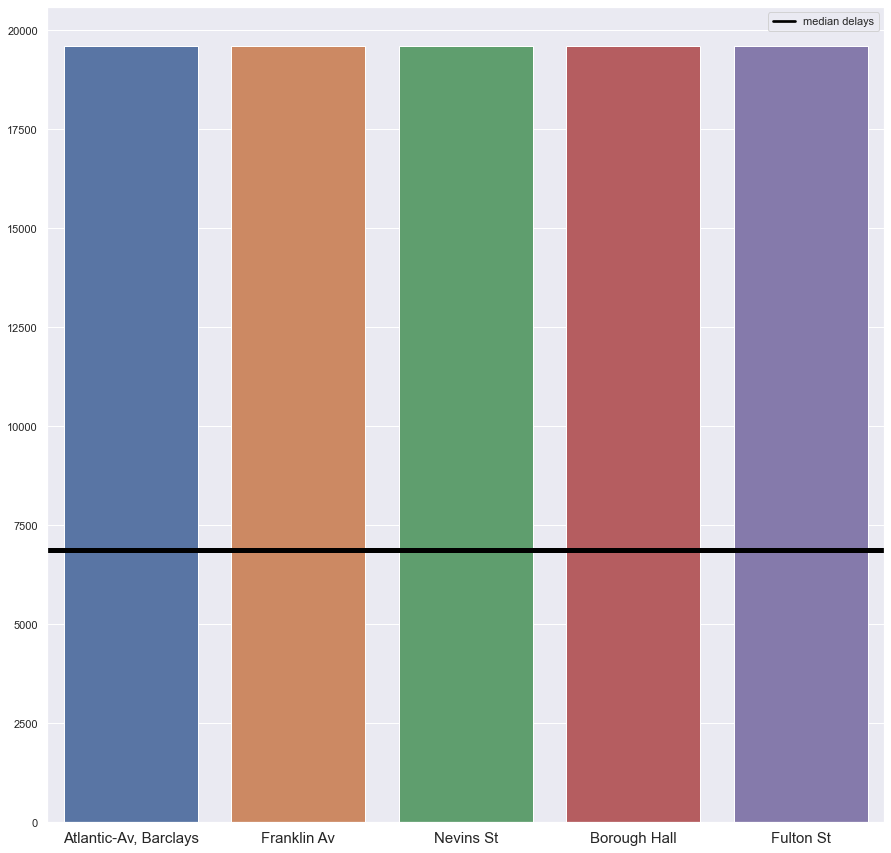

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
sns.barplot(data=top_5).axhline(d_sort['median'].median(),linewidth=5,color='black')
ax.set_xticklabels(['Atlantic-Av, Barclays','Franklin Av','Nevins St',
                    'Borough Hall','Fulton St'],fontsize=15)
leg = ax.legend(labels=['median delays'])
leg.legendHandles[0].set_color('black');

This corresponds to what we saw in the Heat Map

## Ridership Data

I looked at the most used stations per borough in the EDA folder.

Eventually I just went with the top 10 IRT stations. 9/10 were in Manhattan, with the tenth being Flushing-Main St in Queens.

In [19]:
irt['median'] = irt[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top_ovl = irt.sort_values('mean',ascending=False)[:10]
warnings.filterwarnings('ignore')

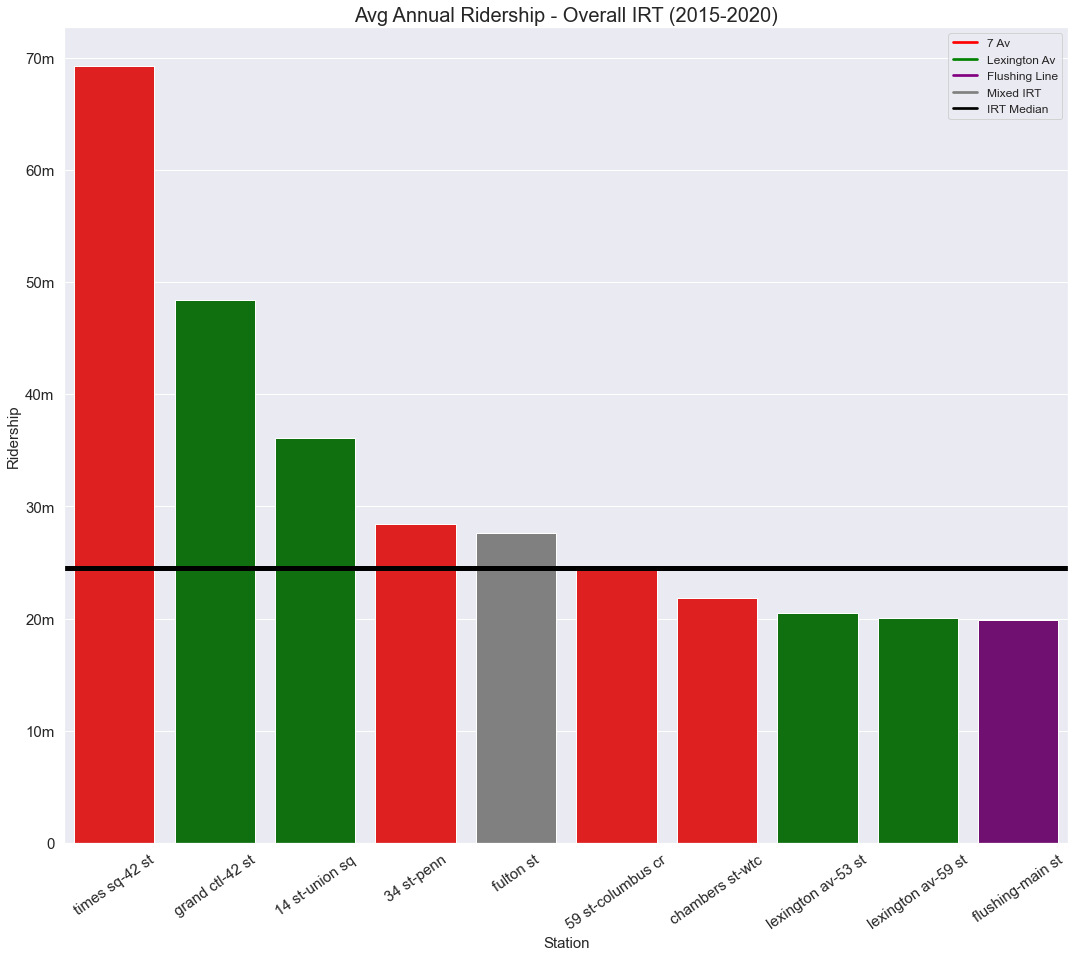

In [20]:
means_ovl = top_ovl[['station','mean']]

fig, ax = plt.subplots(figsize=(18, 15))

x = top_ovl['station']
y = top_ovl['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['red','green','green','red','gray','red','red','green','green','purple']).axhline(
top_ovl['median'].median(),linewidth=5,color='black')
ax.set_yticklabels(['0','10m','20m','30m','40m','50m','60m','70m'],fontsize=15)
ax.set_xticklabels(['times sq-42 st', 'grand ctl-42 st','14 st-union sq','34 st-penn','fulton st',
                    '59 st-columbus cr','chambers st-wtc','lexington av-53 st','lexington av-59 st','flushing-main st'],
                    fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership - Overall IRT (2015-2020)',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['7 Av','Lexington Av','Flushing Line','Mixed IRT','IRT Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('purple')
leg.legendHandles[3].set_color('gray')
leg.legendHandles[4].set_color('black')
plt.show();

## Delays Correlation with Top Stations

In [21]:
stations_delays = ['delayed_irt','times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)','grand ctl-42 st (4/5/6/7)',
                   '14 st-union sq (4/5/6/L/N/Q/R/W)','34 st-penn sta (1/2/3/A/C/E)','fulton st (2/3/4/5/A/C/J/Z)',
                   '59 st-columbus cr (1/A/B/C/D)','chambers st-wtc (1/2/3/A/C/E/R/W)','lexington av-53 st (6/E/M)',
                   'flushing-main st (7)']

In [22]:
top_delays = df[stations_delays]

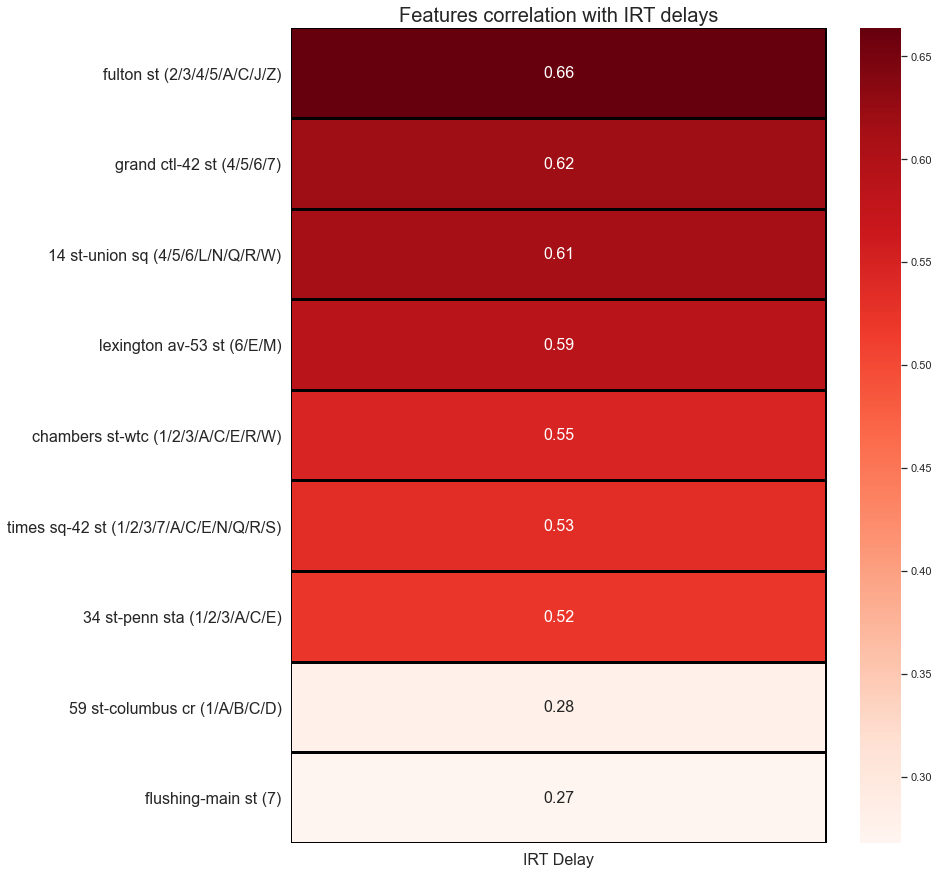

In [23]:
corr = top_delays.corr().drop(['delayed_irt'])
x=corr[['delayed_irt']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_irt'],ascending=0),
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           xticklabels=['IRT Delay']);
ax.set_title('Features correlation with IRT delays',size=20)
ax.tick_params(labelsize=16)

Out of the top stations, Fulton St, Grand Central and 14 St-Union Sq seem to have the biggest effect on delays

# Models

LogisticRegression and Bernoulli Naive Bayes Were best for Unsmoted and Smoted Data respectively.

When I deploy the model in the future, BNB will be the go-to model since station delays are going to be the minority class more often than not.

In [24]:
features = ['rush_hour', 'weekend', 'mon', 'tue', 'wed', 'th', 'fri', 'bronx', 'brooklyn',
            'manhattan', 'queens','direction_bronx', 'direction_brooklyn', 'causes_station',
            'causes_train', 'causes_weather', 'causes_passenger', 'causes_other','direction_manhattan',
            'direction_queens', 'direction_unspecified', 'fastest_wind_spd','avg_wind_spd', 'major_conditions',
            'minor_conditions', 'neutral_conditions', 'clear_conditions', 'max_temp', 'avg_temp', 'min_temp',
            'prcp', 'snowfall', 'snowfall_depth']

In [25]:
top_stations = ['times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S)','grand ctl-42 st (4/5/6/7)','14 st-union sq (4/5/6/L/N/Q/R/W)',
               '34 st-penn sta (1/2/3/A/C/E)','fulton st (2/3/4/5/A/C/J/Z)','59 st-columbus cr (1/A/B/C/D)',
               'chambers st-wtc (1/2/3/A/C/E/R/W)','lexington av-53 st (6/E/M)','flushing-main st (7)']

## Log Reg

In [26]:
with open('data/best_model_lr.pkl','rb') as f:
    model = pkl.load(f)

print(model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.5, class_weight='balanced', dual=True,
                                    fit_intercept=False, random_state=42,
                                    solver='liblinear'))])


In [27]:
for station in top_stations:
    X_new = df[features]
    y_new = df[station]
    y_hat = model.predict(X_new)
    acc = accuracy_score(y_new, y_hat)
    f1 = f1_score(y_new, y_hat)
    
    print(f"""
    Accuracy Score at {station}: {('%.2f' % ((acc)*100))}%.
    
    F1 Score {station}: {('%.2f' % ((f1)*100))}%.
    """)


    Accuracy Score at times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S): 57.86%.
    
    F1 Score times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S): 43.10%.
    

    Accuracy Score at grand ctl-42 st (4/5/6/7): 59.87%.
    
    F1 Score grand ctl-42 st (4/5/6/7): 46.55%.
    

    Accuracy Score at 14 st-union sq (4/5/6/L/N/Q/R/W): 59.61%.
    
    F1 Score 14 st-union sq (4/5/6/L/N/Q/R/W): 46.00%.
    

    Accuracy Score at 34 st-penn sta (1/2/3/A/C/E): 57.83%.
    
    F1 Score 34 st-penn sta (1/2/3/A/C/E): 43.02%.
    

    Accuracy Score at fulton st (2/3/4/5/A/C/J/Z): 58.69%.
    
    F1 Score fulton st (2/3/4/5/A/C/J/Z): 47.35%.
    

    Accuracy Score at 59 st-columbus cr (1/A/B/C/D): 53.21%.
    
    F1 Score 59 st-columbus cr (1/A/B/C/D): 24.92%.
    

    Accuracy Score at chambers st-wtc (1/2/3/A/C/E/R/W): 56.66%.
    
    F1 Score chambers st-wtc (1/2/3/A/C/E/R/W): 40.50%.
    

    Accuracy Score at lexington av-53 st (6/E/M): 60.28%.
    
    F1 Score lexington av-53 st (6/E/M): 47.52%.
 

## BNB

In [28]:
with open('data/best_model_bnb.pkl','rb') as f:
    model = pkl.load(f)

print(model)

Pipeline(steps=[('bnb', BernoulliNB(alpha=0))])


In [29]:
for station in top_stations:
    X_new = df[features]
    y_new = df[station]
    y_hat = model.predict(X_new)
    acc = accuracy_score(y_new, y_hat)
    f1 = f1_score(y_new, y_hat)
    
    print(f"""
    Accuracy Score at {station}: {('%.2f' % ((acc)*100))}%.
    
    F1 Score {station}: {('%.2f' % ((f1)*100))}%.
    """)


    Accuracy Score at times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S): 59.23%.
    
    F1 Score times sq-42 st (1/2/3/7/A/C/E/N/Q/R/S): 43.58%.
    

    Accuracy Score at grand ctl-42 st (4/5/6/7): 61.34%.
    
    F1 Score grand ctl-42 st (4/5/6/7): 47.23%.
    

    Accuracy Score at 14 st-union sq (4/5/6/L/N/Q/R/W): 61.14%.
    
    F1 Score 14 st-union sq (4/5/6/L/N/Q/R/W): 46.76%.
    

    Accuracy Score at 34 st-penn sta (1/2/3/A/C/E): 59.27%.
    
    F1 Score 34 st-penn sta (1/2/3/A/C/E): 43.59%.
    

    Accuracy Score at fulton st (2/3/4/5/A/C/J/Z): 60.31%.
    
    F1 Score fulton st (2/3/4/5/A/C/J/Z): 48.23%.
    

    Accuracy Score at 59 st-columbus cr (1/A/B/C/D): 54.80%.
    
    F1 Score 59 st-columbus cr (1/A/B/C/D): 25.30%.
    

    Accuracy Score at chambers st-wtc (1/2/3/A/C/E/R/W): 58.16%.
    
    F1 Score chambers st-wtc (1/2/3/A/C/E/R/W): 41.10%.
    

    Accuracy Score at lexington av-53 st (6/E/M): 61.72%.
    
    F1 Score lexington av-53 st (6/E/M): 48.18%.
 

# Conclusions

So as we see, there are a number of contributing factors to what causes delays on the IRT line.

This includes the borough, specific stations (as station problems are the biggest cause of delays), and station problems as the main contributing factors.

Running both models got us about the same results: out of the most heavily used stations in the system, the models are able to predict delays with about ~45% F1 (as delays are the minority class) and ~60% accuracy for the BNB model on all stations (except Flushing-Main St, which I suspect is because Queens is somewhat of an outlier borough in the model training).

My recommendations from all of this:

* Station problems are the biggest cause of delays on the IRT line, especially signal problems


* From the most used stations, despite the shinier exterior on some stations such as Fulton St, the old tracks/signals are in desparate need of repair and replacement. I would recommend Fulton St, Grand Central, and 14 St-Union Sq are the most urgent from this subset.